In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Model
import matplotlib.pyplot as plt

from functions import *

### 1. Data import

In [48]:
vib_normal_dataset    =   pd.read_csv('./datas/vibration_normal.csv')
vib_anomaly_dataset   =   pd.read_csv('./datas/vibration_anomaly.csv')
cur_normal_dataset    =   pd.read_csv('./datas/current_normal.csv')
cur_anomaly_dataset   =   pd.read_csv('./datas/current_anomaly.csv')

#### 1.1. Preprocessing & Vibration data visualization

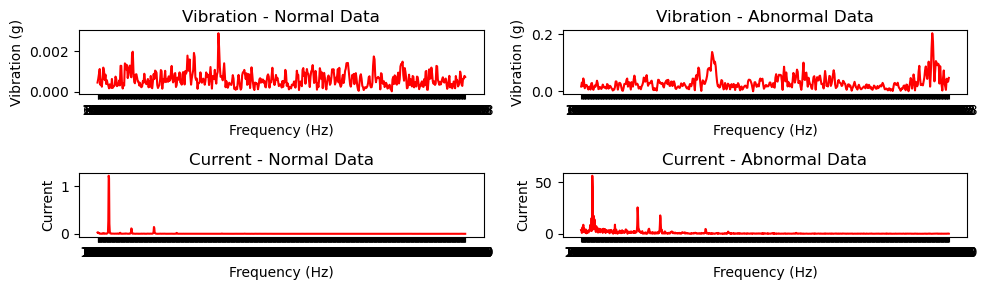

In [49]:
freq = vib_normal_dataset.iloc[0, 1:]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 3))

plt.subplot(2, 2, 1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.plot(vib_normal_dataset.iloc[0, 1:], color='red')
plt.title("Vibration - Normal Data")

plt.subplot(2, 2, 2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.plot(vib_anomaly_dataset.iloc[0, 1:], color='red')
plt.title("Vibration - Abnormal Data")

plt.subplot(2, 2, 3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current')
plt.plot(cur_normal_dataset.iloc[0, 1:], color='red')
plt.title("Current - Normal Data")

plt.subplot(2, 2, 4)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current')
plt.plot(cur_anomaly_dataset.iloc[0, 1:], color='red')
plt.title("Current - Abnormal Data")

plt.tight_layout()
plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 16

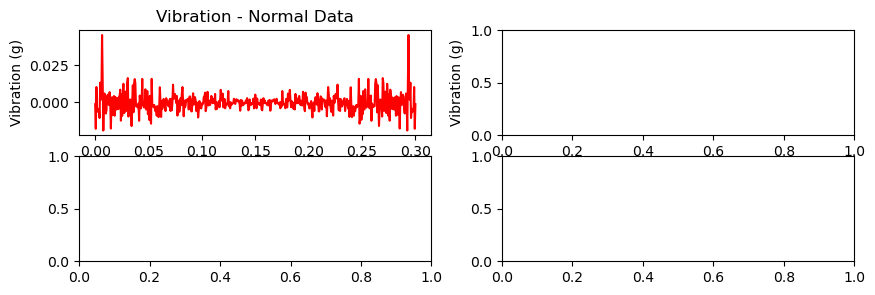

In [114]:
time_vib = np.linspace(0, 0.3, 511)
time_cur = np.linspace(0, 0.5, 1023)

# IFFT
vib_normal_time  = np.real(np.fft.ifft(vib_normal_dataset.iloc[:, 1:])  * len(vib_normal_dataset.iloc[0, 1:]))[:, 1:]
vib_anomaly_time = np.real(np.fft.ifft(vib_anomaly_dataset.iloc[:, 1:]) * len(vib_anomaly_dataset.iloc[0, 1:]))[:, 1:]
cur_normal_time  = np.real(np.fft.ifft(cur_normal_dataset.iloc[:, 1:])  * len(cur_normal_dataset.iloc[0, 1:]))[:, 1:]
cur_anomaly_time = np.real(np.fft.ifft(cur_anomaly_dataset.iloc[:, 1:]) * len(cur_anomaly_dataset.iloc[0, 1:]))[:, 1:]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 3))

plt.subplot(2, 2, 1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.plot(time_vib, vib_normal_time[0], color='red')
plt.title("Vibration - Normal Data")

plt.subplot(2, 2, 2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.plot(time_vib, vib_anomaly_time[0], color='red')
plt.title("Vibration - Abnormal Data")

plt.subplot(2, 2, 3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current')
plt.plot(time_cur, cur_normal_time[0], color='red')
plt.title("Current - Normal Data")

plt.subplot(2, 2, 4)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current')
plt.plot(time_cur, cur_anomaly_time[0], color='red')
plt.title("Current - Abnormal Data")

plt.tight_layout()
plt.show()

In [52]:
vib_train_dataset = vib_normal_dataset.iloc[:1758, 1:].values
vib_test_dataset  = pd.concat([vib_normal_dataset.iloc[1758:, 1:], vib_anomaly_dataset.iloc[:, 1:]], ignore_index=True).values

print('진동 학습데이터 수:', len(vib_train_dataset))
print('진동 평가데이터 수:', len(vib_test_dataset))

    
cur_train_dataset = cur_normal_dataset.iloc[:8170, 1:].values
cur_test_dataset  = pd.concat([cur_normal_dataset.iloc[8170:, 1:], cur_anomaly_dataset.iloc[:, 1:]], ignore_index=True).values

print("-------------------------------------------------")
print('전류 학습데이터 수:', len(cur_train_dataset))
print('전류 평가데이터 수:', len(cur_test_dataset))

진동 학습데이터 수: 1758
진동 평가데이터 수: 32
-------------------------------------------------
전류 학습데이터 수: 8170
전류 평가데이터 수: 64


### 4. Data standardization

In [53]:
scaler = StandardScaler()

vib_train_dataset  =  scaler.fit_transform(vib_train_dataset)
vib_test_dataset   =  scaler.transform(vib_test_dataset)
cur_train_dataset  =  scaler.fit_transform(cur_train_dataset)
cur_test_dataset   =  scaler.transform(cur_test_dataset)

#### 4.1. Standardized vibration data

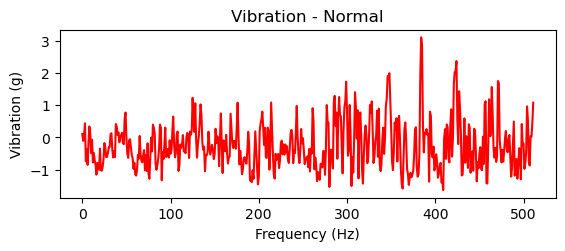

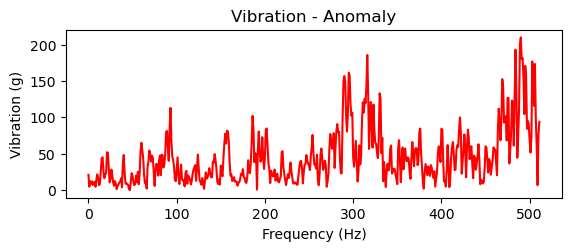

In [54]:
plt.subplot(2,1,1)
plt.title('Vibration - Normal')
plt.plot(vib_train_dataset[0], color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.show()

plt.subplot(2,1,2)
plt.title('Vibration - Anomaly')
plt.plot(vib_test_dataset[-1], color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.show()

#### 4.2. Standardized current data

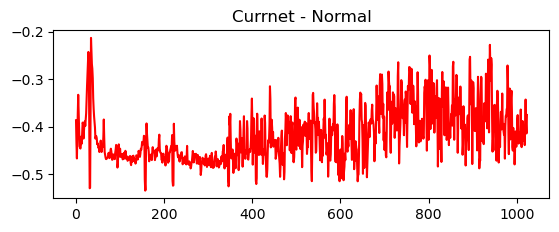

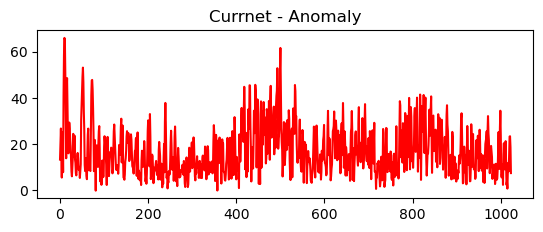

In [55]:
plt.subplot(2,1,1)
plt.title('Currnet - Normal')
plt.plot(cur_train_dataset[0], color='red')
plt.show()

plt.subplot(2,1,1)
plt.title('Currnet - Anomaly')
plt.plot(cur_test_dataset[-1], color='red')
plt.show()

![image](https://github.com/HanMinung/EmbeddedController/assets/99113269/89978d9f-4ae8-4c28-8ae1-16d68d94f034)
